<a href="https://colab.research.google.com/github/wcj365/college-scorecard/blob/master/6-value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# College Scorecard Data Exploration
## Part Six - Value Comparison  
There can be many ways to define the value a college provides. From pure economics perspective, we can simply look at the output (potential earnings) vs input (tuition). Here, for similicity, we define value as the ratio of earning potential over tution. The higher the ratio is, the more value a college provides to its students and their families. We attempt to compare between public and private institutions.


## Step 1 - Import Relevant Python Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt    
import seaborn as sns
import altair as alt               

## Step 2 - Download and Save the Data
Since this notebook is created and run in Google Colab, we use the content folder mounted to the VM running the notebook. However, keep in mind that the VM is not permanent. Each time we open this notebook in Colab, we need to download the data from College Scorecard website again since we have a new VM.

In [4]:
# This is another way to download data. 
# Since the VM is a Linux machine, we use Linux shell commands.

%%bash
export FILE_PATH="https://ed-public-download.app.cloud.gov/downloads/"
export FILE_NAME="Most-Recent-Cohorts-All-Data-Elements.csv"

curl $FILE_PATH$FILE_NAME > ./$FILE_NAME
ls -al

total 150076
drwxr-xr-x 1 root root      4096 Mar  7 19:46 .
drwxr-xr-x 1 root root      4096 Mar  7 19:38 ..
drwxr-xr-x 1 root root      4096 Mar  3 18:11 .config
-rw-r--r-- 1 root root 153660508 Mar  7 19:46 Most-Recent-Cohorts-All-Data-Elements.csv
drwxr-xr-x 1 root root      4096 Mar  3 18:11 sample_data


## Load Data into Pandas Dataframe

In [40]:
COLUMNS_OF_INTEREST = ['UNITID', 'CONTROL', 'INSTNM', 'CITY', 'STABBR',"REGION", "MD_EARN_WNE_P6","TUITIONFEE_IN"]
FILE_NAME = "Most-Recent-Cohorts-All-Data-Elements.csv"

df = pd.read_csv(FILE_NAME, usecols = COLUMNS_OF_INTEREST)
df.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Data columns (total 8 columns):
UNITID            7112 non-null int64
INSTNM            7112 non-null object
CITY              7112 non-null object
STABBR            7112 non-null object
CONTROL           7112 non-null int64
REGION            7112 non-null int64
TUITIONFEE_IN     4021 non-null float64
MD_EARN_WNE_P6    5887 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 444.6+ KB


In [89]:
df.sample(5)

,UNITID,INSTNM,CITY,STABBR,CONTROL,REGION,TUITIONFEE_IN,MD_EARN_WNE_P6,VALUE
5671,458441,Platt College-Miller-Motte Technical-Columbus,Columbus,GA,3,5,11080.0,19400.0,0.57
6718,13017401,Porter and Chester Institute of Rocky Hill,Rocky Hill,CT,3,1,17220.0,31100.0,0.55
3783,237118,Alderson Broaddus University,Philippi,WV,2,5,26610.0,34500.0,0.77
1800,174756,St Cloud Technical and Community College,Saint Cloud,MN,1,4,5359.0,34100.0,0.16
333,116226,Interior Designers Institute,Newport Beach,CA,3,8,18250.0,35000.0,0.52


## Step 4 - Cleanse Data

In [41]:
# notice from the output of info(), MD_EARN_WNE_P6 is of type object.
# it Should be numerical. There is issue with the column.
# drop rows that have "PrivacySuppressed" in th earnings.

df = df[df['MD_EARN_WNE_P6'] != "PrivacySuppressed"] 

df.shape

(6583, 8)

In [0]:
# Convert the earnings from categorical to numeric type

df['MD_EARN_WNE_P6'] = df['MD_EARN_WNE_P6'].astype(float)


In [43]:
# drop all rows that have missing values

df.dropna(inplace=True)
df.shape

(3577, 8)

In [44]:
# Drop the rows that has 0 tution or 0 earnings

df = df[df['TUITIONFEE_IN'] > 0]
df = df[df['MD_EARN_WNE_P6'] > 0]
df.shape

(3577, 8)

In [105]:
# Calculate VALUE and add it to the data frame
import numpy as np
df["VALUE"] = np.log(round(df['MD_EARN_WNE_P6'] / df['TUITIONFEE_IN'], 2))
df["VALUE"].sample(5)

6823    1.856298
4871    0.683097
7024    0.871293
2559    2.083185
5491    0.336472
Name: VALUE, dtype: float64

In [106]:
# Calculate descriptive statistics

df["VALUE"].describe()

count    3577.000000
mean        1.030337
std         0.849091
min        -1.049822
25%         0.300105
50%         0.932164
75%         1.686399
max         4.157632
Name: VALUE, dtype: float64

In [107]:
df.sort_values(by="VALUE",ascending=True).head(120)

,UNITID,INSTNM,CITY,STABBR,CONTROL,REGION,TUITIONFEE_IN,MD_EARN_WNE_P6,VALUE
4029,247649,Landmark College,Putney,VT,2,1,54750.0,19300.0,-1.049822
2315,192712,Manhattan School of Music,New York,NY,2,2,44600.0,16800.0,-0.967584
1556,166018,Hampshire College,Amherst,MA,2,1,51608.0,20700.0,-0.916291
1611,167792,Bard College at Simon's Rock,Great Barrington,MA,2,1,53418.0,21700.0,-0.891598
1418,160959,College of the Atlantic,Bar Harbor,ME,2,1,43542.0,18500.0,-0.867501
...,...,...,...,...,...,...,...,...,...
4691,430810,New Hampshire Institute of Art,Manchester,NH,2,1,26880.0,21400.0,-0.223144
3360,221351,Rhodes College,Memphis,TN,2,5,46504.0,37100.0,-0.223144
427,121345,Pomona College,Claremont,CA,2,8,51075.0,41100.0,-0.223144
630,130697,Wesleyan University,Middletown,CT,2,1,52804.0,42100.0,-0.223144


In [108]:
alt.Chart(df).mark_area(opacity=1, interpolate='step').encode(
    alt.X("VALUE:Q", bin=alt.Bin(maxbins=200)),
    alt.Y('count()',stack=None),
    alt.Row('CONTROL:N')
).properties(
    width=400,
    height=200
)

alt.Chart(...)

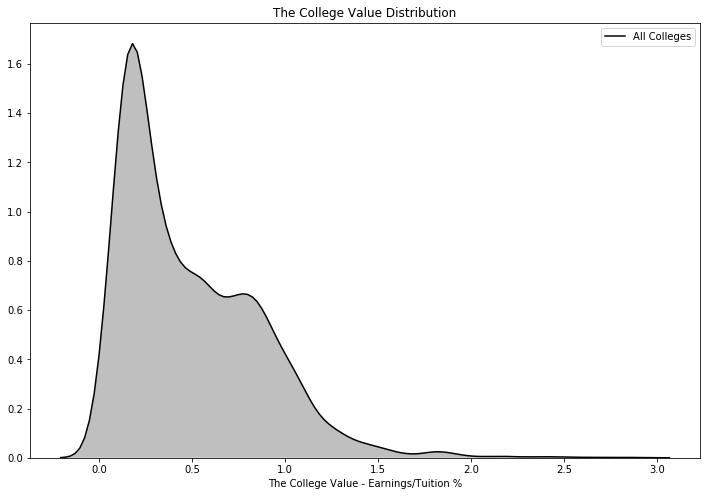

In [53]:
fig,ax = plt.subplots(figsize=(12, 8))
sns.kdeplot(df["VALUE"],shade=True,color="black",label="All Colleges")
ax.set_title("The College Value Distribution")
ax.set_xlabel("The College Value - Earnings/Tuition %")
plt.show()

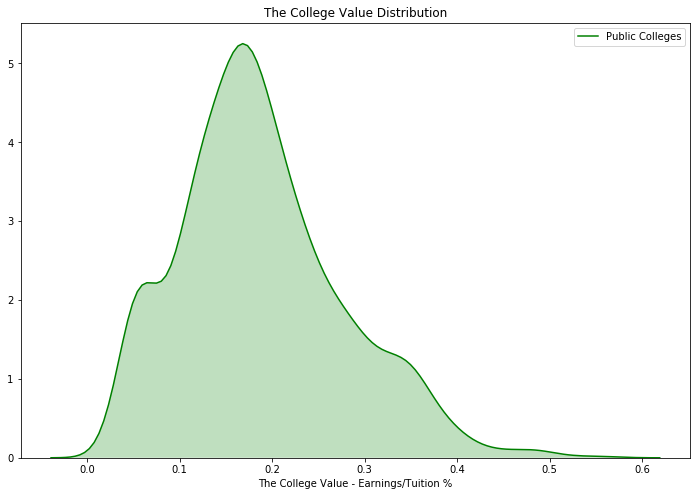

In [70]:
public = df[df["CONTROL"] == 1]
fig,ax = plt.subplots(figsize=(12, 8))
sns.kdeplot(public["VALUE"],shade=True,color="green",label="Public Colleges")
ax.set_title("The College Value Distribution")
ax.set_xlabel("The College Value - Earnings/Tuition %")
plt.show()

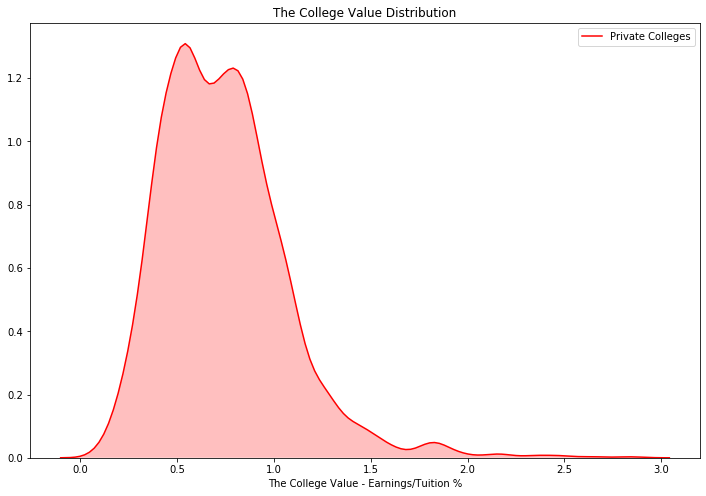

In [71]:
public = df[df["CONTROL"] != 1]
fig,ax = plt.subplots(figsize=(12, 8))
sns.kdeplot(public["VALUE"],shade=True,color="red",label="Private Colleges")
ax.set_title("The College Value Distribution")
ax.set_xlabel("The College Value - Earnings/Tuition %")
plt.show()

In [0]:
ax = sns.kdeplot(df1["DiffMeanHourlyPercent"],shade=True,color="blue",label="All Companies")
plt.xlim([-75,75])
ax.set_title("Differences in Mean Hourly Pay, Electricity Sector and All Companies")
ax.set_xlabel("Difference % (DiffMeanHourlyPercent)")
plt.legend()

## The Region Mapping

-    0: "U.S. Service Schools",
-    1: "New England (CT, ME, MA, NH, RI, VT)",
-    2: "Mid East (DE, DC, MD, NJ, NY, PA)",
-    3: "Great Lakes (IL, IN, MI, OH, WI)",
-    4: "Plains (IA, KS, MN, MO, NE, ND, SD)",
-    5: "Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)",
-    6: "Southwest (AZ, NM, OK, TX)",
-    7: "Rocky Mountains (CO, ID, MT, UT, WY)",
-    8: "Far West (AK, CA, HI, NV, OR, WA)",
-    9: "Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)"


In [0]:
REGION_DICT = {
    0: "U.S. Service Schools",
    1: "New England",
    2: "Mid East",
    3: "Great Lakes",
    4: "Plains",
    5: "Southeast",
    6: "Southwest",
    7: "Rocky Mountains",
    8: "Far West",
    9: "Outlying Areas"
}

grouped["REGION"].replace(to_replace=REGION_DICT, inplace=True)

grouped.sample(10)

,STABBR,PAR_ED_PCT_1STGEN,MD_EARN_WNE_P6,REGION
20,KY,0.49,24.0,Southeast
38,NY,0.41,33.0,Mid East
43,PR,0.46,15.0,Outlying Areas
35,NJ,0.51,29.0,Mid East
8,DC,0.43,34.0,Mid East
16,ID,0.45,25.0,Rocky Mountains
19,KS,0.41,30.0,Plains
11,FM,0.47,16.0,Outlying Areas
7,CT,0.46,34.0,New England
23,MD,0.45,30.0,Mid East


In [82]:
np.random.seed(42)

# Generating Data
source = pd.DataFrame({
    'Trial A': np.random.normal(0, 0.8, 1000),
    'Trial B': np.random.normal(-2, 1, 1000),
    'Trial C': np.random.normal(3, 2, 1000)
})

alt.Chart(source).transform_fold(
    ['Trial A', 'Trial B', 'Trial C'],
    as_=['Experiment', 'Measurement']
).mark_area(
    opacity=0.3,
    interpolate='step'
).encode(
    alt.X('Measurement:Q', bin=alt.Bin(maxbins=100)),
    alt.Y('count()', stack=None),
    alt.Row('Experiment:N')
)

alt.Chart(...)